# Project Overview
For this project, I'm assuming the role of a **Data Scientist / Data Analyst** at a new startup investment firm. My goal is to help customers invest their money in stocks. My main task will be to **extract financial data, like historical share prices and quarterly revenue reports, from various sources**. I'll be using **Python libraries and web scraping** techniques on popular stocks, specifically Tesla, Amazon, AMD, and GameStop. After I collect this data, I'll visualize it in a **dashboard** to identify any patterns or trends.

## Dashboard Analytics Displayed
A key part of this project involves dashboards, which are great for clearly displaying **key performance indicators (KPIs)**. I'll be practicing how to **analyze datasets and extract these important KPIs**. The prompts throughout the course will guide me in accessing and displaying data on these dashboards. Learning how to present KPIs effectively on a dashboard is a core part of this assignment. For data visualization, I'll be using Plotly.

## Stock Shares

A company's stock share is, fundamentally, a segment of that company; to be precise, a stock **(also recognized as equity)** serves as a security that signifies the ownership of a fractional part of a corporation. This ownership grants the proprietor of the stock a proportion of the corporation's assets and profits that aligns with the extent of their stock holdings. Individual increments of stock are termed **"shares"**.

Someone who invests their money can buy a stock and then sell it later. **If the stock's price goes up, that person makes a profit (they earn money). But if the price goes down, they'll face a loss (they lose money)**. Figuring out a stock's price is quite complicated. Its value depends on things like how many shares of the company are available, how much money the company is expected to make in the future, and many other factors. People buy and sell stocks all day long. **The stock ticker is like a live update of a stock's price**, continuously refreshed throughout the day by the different places where stocks are traded, called **stock exchanges**. In this exercise, I'll be using something called the y-finance API to get these stock updates and pull out information about the stock. After that, I'll be asked some questions about what I found.


In [8]:
!pip install yfinance
!pip install matplotlib
!pip install requests
# !pip install pandas==1.3.3
import yfinance as yf
import pandas as pd
import requests

You should consider upgrading via the 'C:\Users\pipe_\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\pipe_\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\pipe_\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Using the yfinance Library to Extract Stock Data
Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.

In [9]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

In [10]:
URL="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
file_name = 'apple.json'

### Stock info

Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.

In [12]:
import json
response = requests.get(URL)

with open(file_name, 'wb') as f:
    f.write(response.content)
with open(file_name, 'r') as json_file:
    apple_info = json.load(json_file)
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [13]:
apple_info['country']

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [14]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.

In [15]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [16]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:

<Axes: xlabel='Date'>

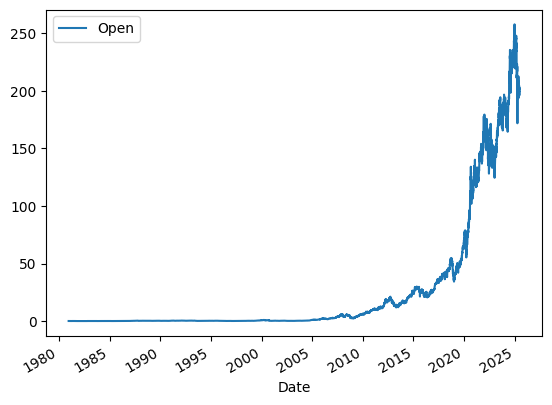

In [17]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [21]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
Name: Dividends, Length: 87, dtype: float64

We can plot the dividends overtime

<Axes: xlabel='Date'>

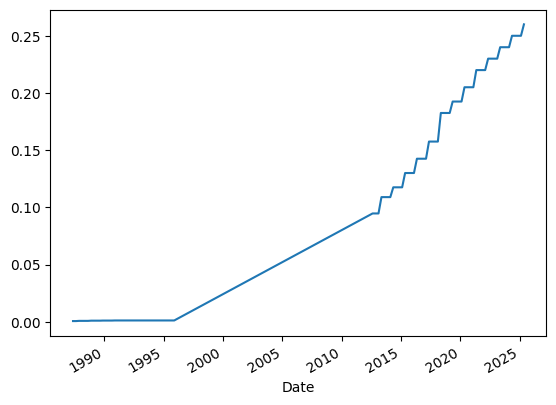

In [22]:
apple.dividends.plot()